# Birds' Bones and Living Habits

## Measurements of bones and ecological groups of birds
### Context
There are many kinds of birds: pigeons, ducks, ostriches, penguins... Some are good at flying, others can't fly but run fast. Some swim under water, others wading in shallow pool.

According to their living environments and living habits, birds are classified into different ecological groups. There are 8 ecological groups of birds:

- Swimming Birds
- Wading Birds
- Terrestrial Birds
- Raptors
- Scansorial Birds
- Singing Birds
- Cursorial Birds (not included in dataset)
- Marine Birds (not included in dataset)

First 6 groups are main and are covered by this dataset.

Apparently, birds belong to different ecological groups have different appearances: flying birds have strong wings and wading birds have long legs. Their living habits are somewhat reflected in their bones' shapes. As data scientists we may think of examining the underlying relationship between sizes of bones and ecological groups , and recognising birds' ecological groups by their bones' shapes.

### Content
There are 420 birds contained in this dataset. Each bird is represented by 10 measurements (features):

- Length and Diameter of Humerus
- Length and Diameter of Ulna
- Length and Diameter of Femur
- Length and Diameter of Tibiotarsus
- Length and Diameter of Tarsometatarsus

![BirdsBones](../Images/Birds_Bones.jpg)

All measurements are continuous float numbers (mm) with missing values represented by empty strings. The skeletons of this dataset are collections of Natural History Museum of Los Angeles County. They belong to 21 orders, 153 genera, 245 species.

Each bird has a label for its ecological group:

- SW: Swimming Birds
- W: Wading Birds
- T: Terrestrial Birds
- R: Raptors
- P: Scansorial Birds
- SO: Singing Birds
### Acknowledgements

This dataset is provided by Dr. D. Liu of Beijing Museum of Natural History.

## Inspiration

This dataset is a 420x10 size continuous values unbalanced multi-class dataset. What can be done include:

- Data Visualisation
- Statical Analysis
- Supervised Classification
- Unsupervised Clustering

## Data (25 KB)

### Columns
- **id**: Sequential id
- **huml**: Length of Humerus (mm)
- **humw**: Diameter of Humerus (mm)
- **ulnal**: Length of Ulna (mm)
- **ulnaw**: Diameter of Ulna (mm)
- **feml**: Length of Femur (mm)
- **femw**: Diameter of Femur (mm)
- **tibl**: Length of Tibiotarsus (mm)
- **tibw**: Diameter of Tibiotarsus (mm)
- **tarl**: Length of Tarsometatarsus (mm)
- **tarw**: Diameter of Tarsometatarsus (mm)
- **type**: Ecological Group

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
birds = pd.read_csv('datasets/bird data.csv')
birds.head()

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


In [3]:
birds.shape

(420, 12)

In [4]:
birds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 12 columns):
id       420 non-null int64
huml     419 non-null float64
humw     419 non-null float64
ulnal    417 non-null float64
ulnaw    418 non-null float64
feml     418 non-null float64
femw     419 non-null float64
tibl     418 non-null float64
tibw     419 non-null float64
tarl     419 non-null float64
tarw     419 non-null float64
type     420 non-null object
dtypes: float64(10), int64(1), object(1)
memory usage: 39.5+ KB


In [5]:
birds.isnull().sum()

id       0
huml     1
humw     1
ulnal    3
ulnaw    2
feml     2
femw     1
tibl     2
tibw     1
tarl     1
tarw     1
type     0
dtype: int64

In [6]:
birds.dropna(inplace=True)

In [7]:
birds.isnull().sum()

id       0
huml     0
humw     0
ulnal    0
ulnaw    0
feml     0
femw     0
tibl     0
tibw     0
tarl     0
tarw     0
type     0
dtype: int64

In [8]:
birds.duplicated().sum()

0

In [9]:
birds.drop_duplicates(inplace=True)

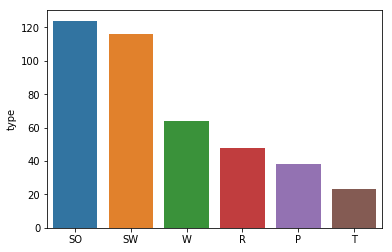

In [10]:
sns.barplot(birds['type'].value_counts().index,birds['type'].value_counts())

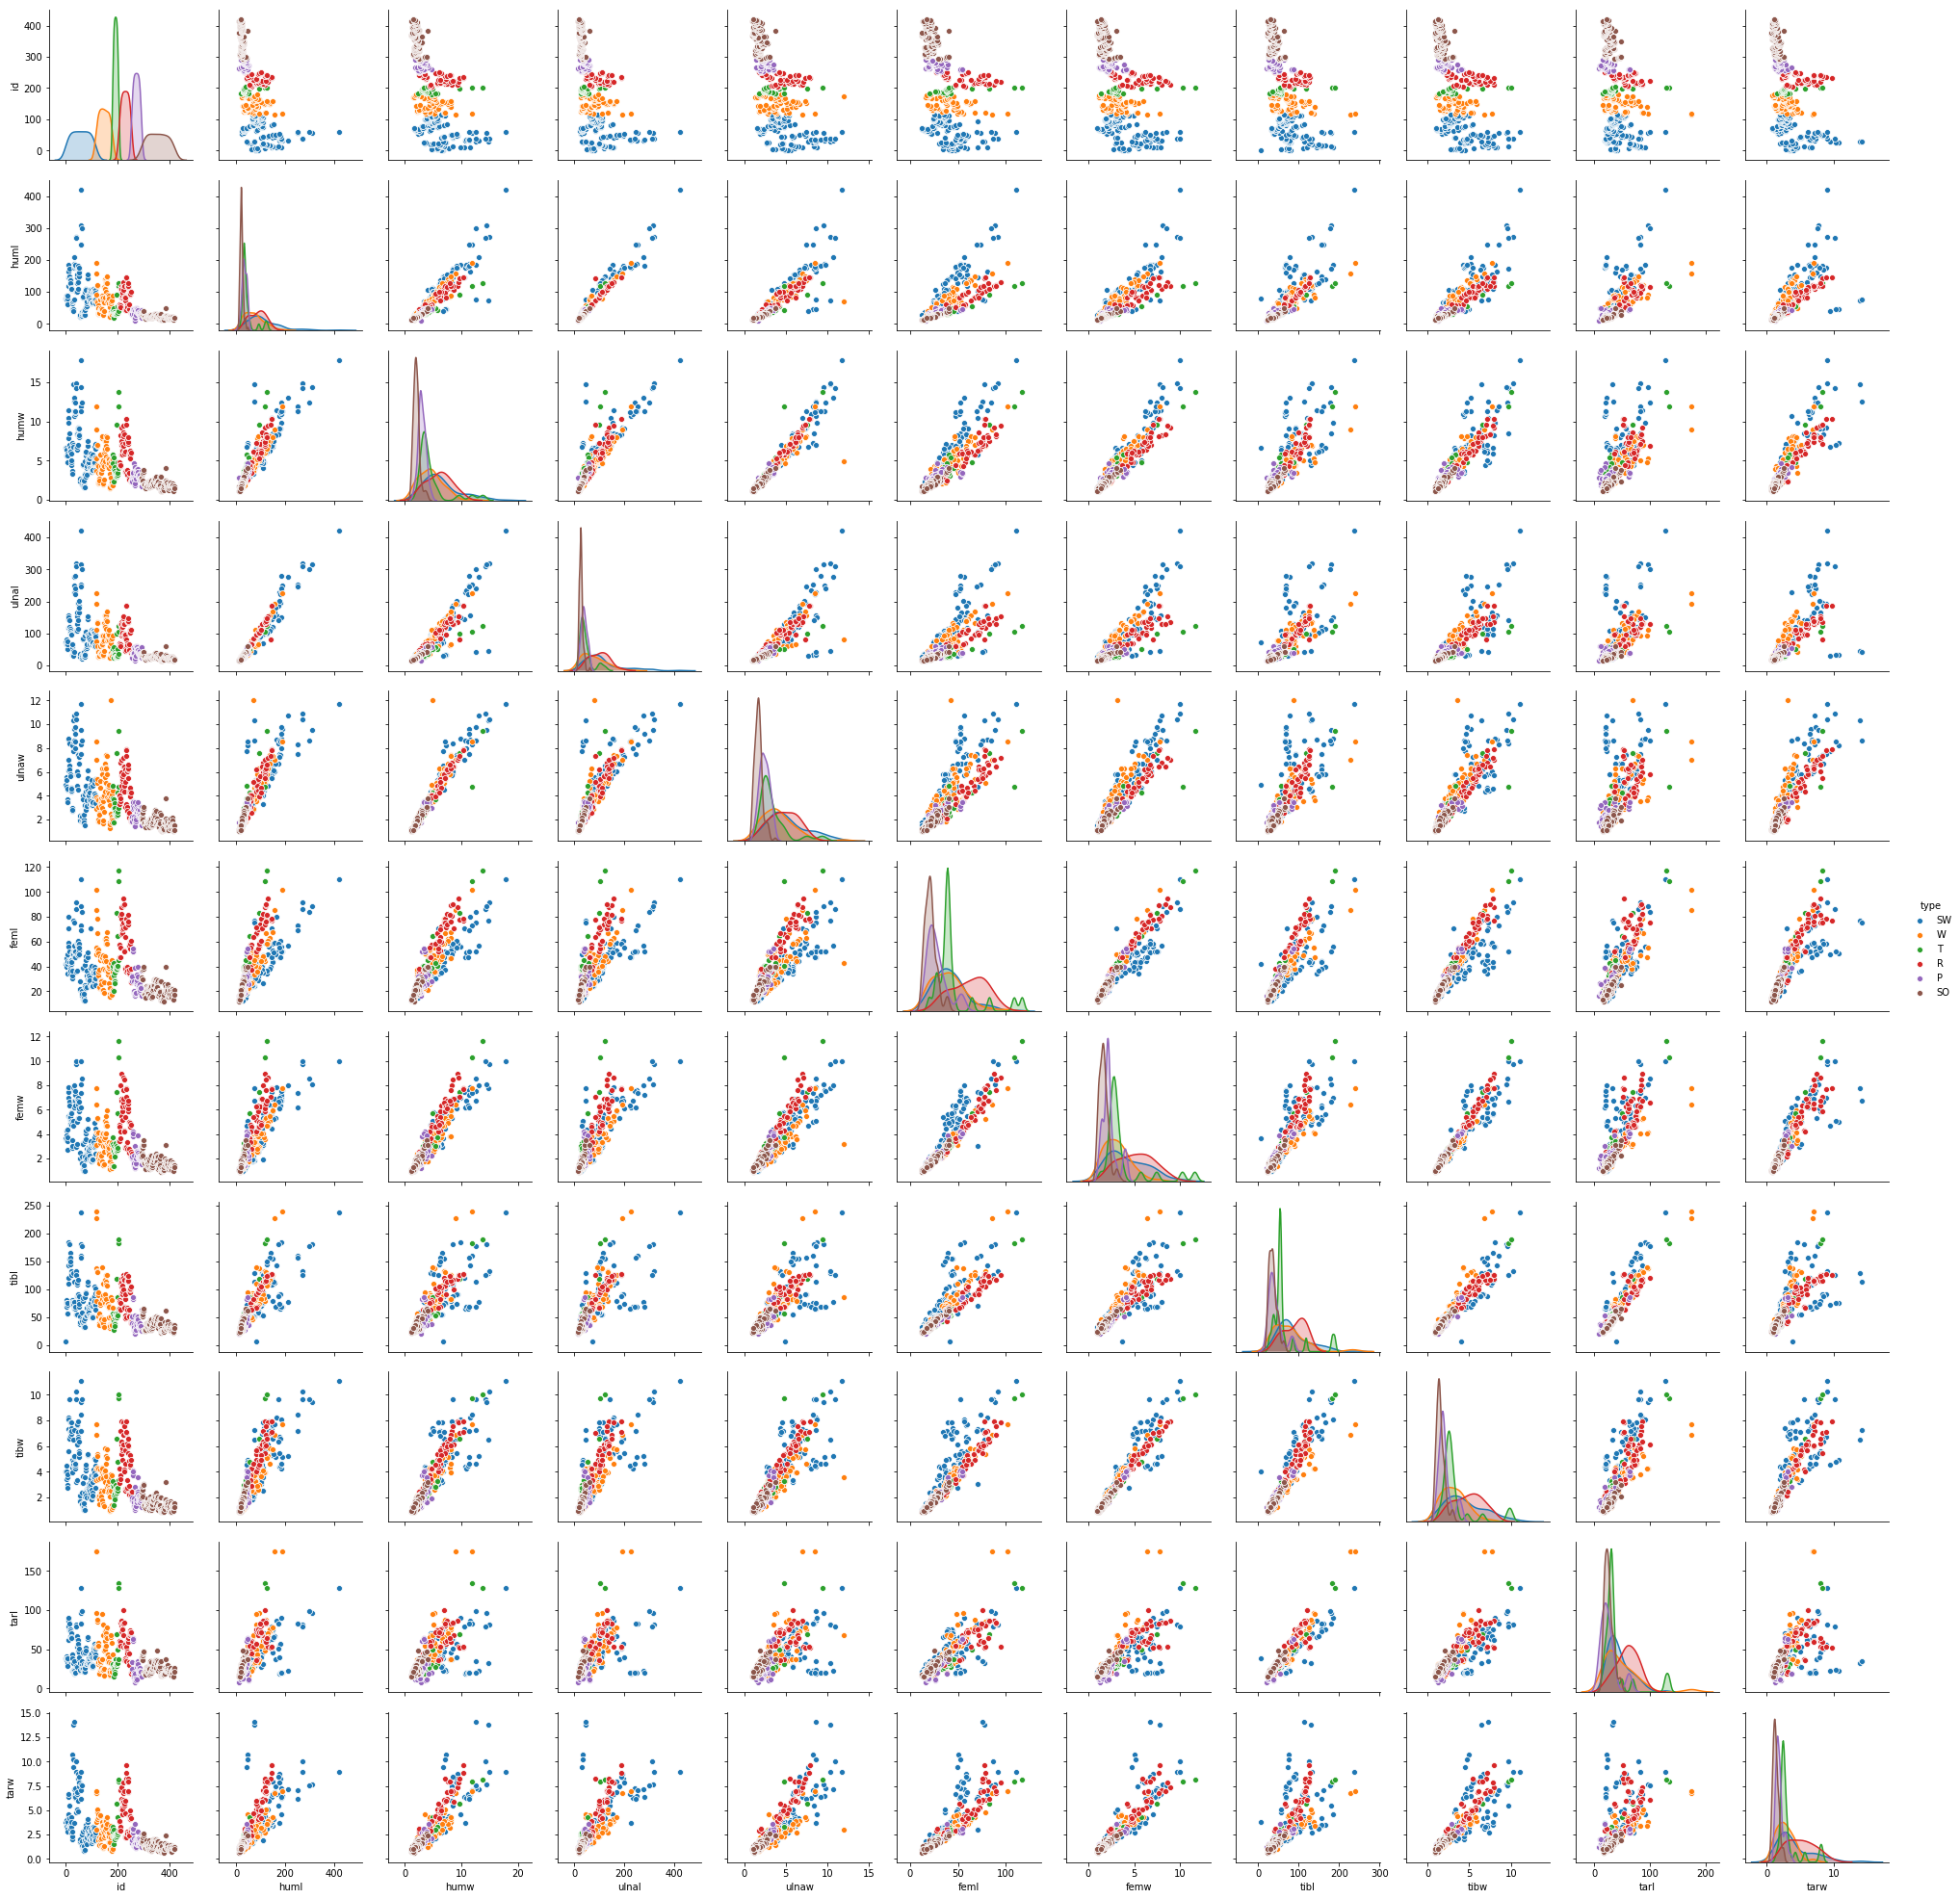

In [11]:
sns.pairplot(birds,hue = 'type')

In [12]:
X = birds.drop(['id','type'],axis = 1)
Y = birds['type']

from sklearn.preprocessing import LabelEncoder
lbc = LabelEncoder()
Y = lbc.fit_transform(Y)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

In [14]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
Y_pred = tree_clf.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score

confusion_matrix(Y_test,Y_pred)

array([[ 3,  0,  2,  0,  0,  7],
       [ 0,  5,  0,  3,  0,  0],
       [ 0,  2, 36,  0,  0,  2],
       [ 1,  9,  1, 27,  0,  6],
       [ 0,  6,  0,  0,  0,  0],
       [ 0,  3,  0,  8,  0,  3]], dtype=int64)

In [16]:
accuracy_score(Y_test,Y_pred)

0.5967741935483871

In [17]:
import os
os.environ["PATH"]+=os.environ['PATH']+';'+r'G:\Learnings\MSTP\For Class\datasets\release\bin'

In [18]:
#pip install pydotplus

In [19]:
cls_names = birds.type.value_counts().index
cls_names

Index(['SO', 'SW', 'W', 'R', 'P', 'T'], dtype='object')

In [20]:
from sklearn.tree import export_graphviz

export_graphviz(tree_clf,out_file='birds.dot',class_names=cls_names,
                rounded=True,filled=True)

In [21]:
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

In [22]:
X_train.columns

Index(['huml', 'humw', 'ulnal', 'ulnaw', 'feml', 'femw', 'tibl', 'tibw',
       'tarl', 'tarw'],
      dtype='object')

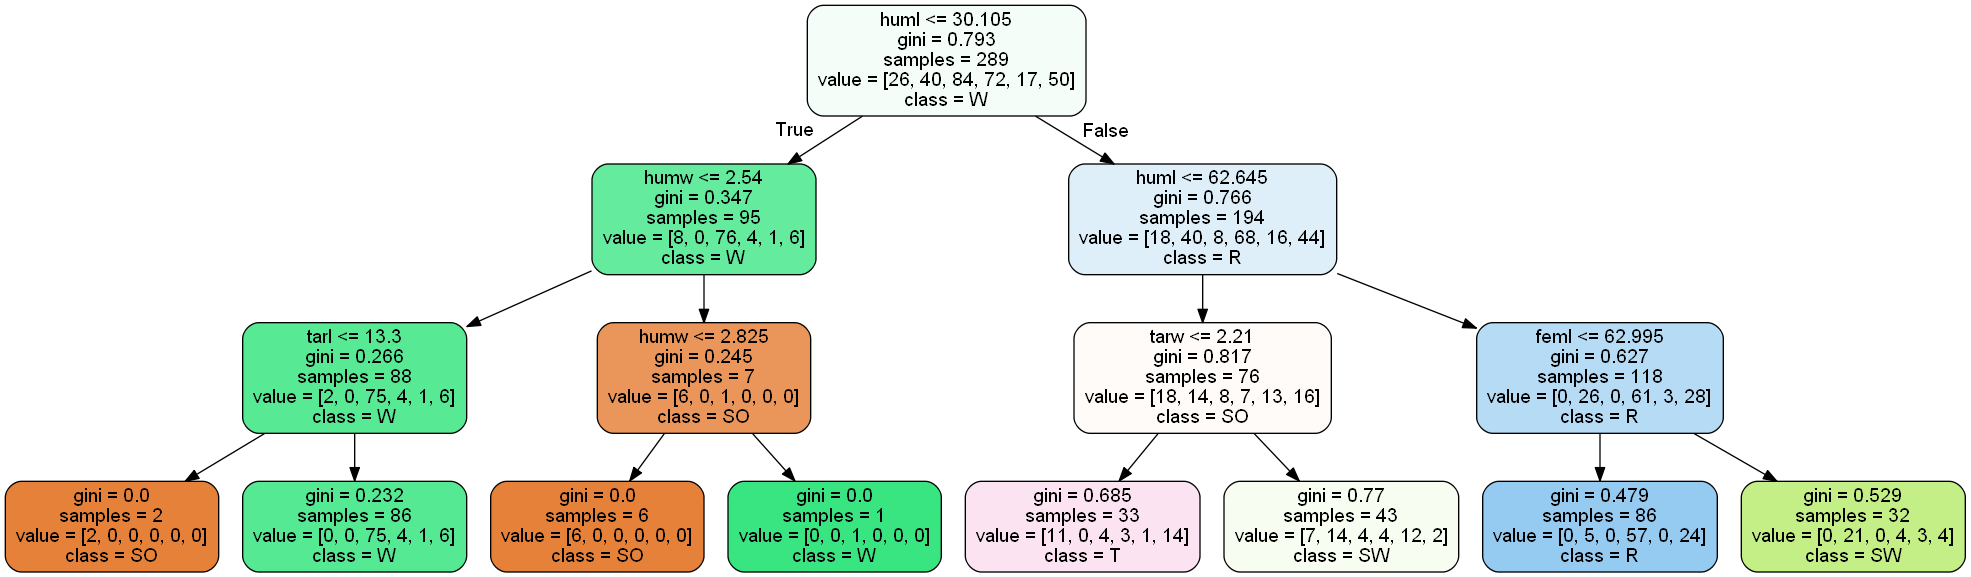

In [23]:
dot_data = StringIO()
export_graphviz(tree_clf,out_file=dot_data,filled=True, rounded=True,
                feature_names=X_train.columns,class_names = cls_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())